# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats # added this dependency
from scipy.stats import linregress
from pprint import pprint # added this dependency

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 626


['yumen',
 'codrington',
 'cape town',
 'umzimvubu',
 'darhan',
 'albany',
 'klaksvik',
 'hobart',
 'rikitea',
 'kangaatsiaq',
 'georgetown',
 'barentsburg',
 'ushuaia',
 'toftir',
 'sabha',
 'sitka',
 'bossembele',
 'pevek',
 'amderma',
 'salalah',
 'tarko-sale',
 'lata',
 'saskylakh',
 'siutu',
 'jamestown',
 'taolanaro',
 'cairns',
 'port macquarie',
 'tarudant',
 'pangnirtung',
 'port hedland',
 'san ramon',
 'shchelyayur',
 'busselton',
 'bilma',
 'severo-kurilsk',
 'tabory',
 'quatre cocos',
 'skovde',
 'ponta do sol',
 'burnie',
 'sistranda',
 'ken caryl',
 'qaanaaq',
 'hilo',
 'meulaboh',
 'puerto ayora',
 'pisco',
 'imbituba',
 'east london',
 'umm durman',
 'razole',
 'rawson',
 'butaritari',
 'guarapari',
 'saint-philippe',
 'little current',
 'port elizabeth',
 'kapaa',
 'taoudenni',
 'sentyabrskiy',
 'new norfolk',
 'sampit',
 'saleaula',
 'san ramon de la nueva oran',
 'mataura',
 'cayenne',
 'khandyga',
 'letlhakane',
 'egvekinot',
 'vaini',
 'mweka',
 'fort-shevchenko',

In [20]:
# Do an API pull from openweather, with target city. This is for testing the API key, and the syntax; to be use further in the for loop code next line.
# Set the API base URL
url2 = "https://api.openweathermap.org/data/2.5/weather?&units=metric"

# Set city
city2 = 'airai'

# Build query url
query = url2 + "&appid=" + weather_api_key + "&q=" + city2

# Run request and json-ify
response = requests.get(query)
response_json = response.json()

# Print the json (pretty printed)
pprint(response_json)

# Print relevant data to assist in the "for loop code"
print(response_json["coord"]["lat"])
print(response_json["coord"]["lon"])
print(response_json["main"]["temp_max"])
print(response_json["main"]["humidity"])
print(response_json["clouds"]["all"])
print(response_json["wind"]["gust"])
print(response_json["dt"])


{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': -8.9266, 'lon': 125.4092},
 'dt': 1680429092,
 'id': 1651810,
 'main': {'feels_like': 17.31,
          'grnd_level': 855,
          'humidity': 96,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 17.04,
          'temp_max': 17.04,
          'temp_min': 17.04},
 'name': 'Airai',
 'sys': {'country': 'TL', 'sunrise': 1680385294, 'sunset': 1680428545},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 109, 'gust': 0.99, 'speed': 0.84}}
-8.9266
125.4092
17.04
96
94
0.99
1680429092


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["gust"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | cape town
City not found. Skipping...
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | darhan
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | hobart
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kangaatsiaq
Processing Record 11 of Set 1 | georgetown
City not found. Skipping...
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 14 of Set 1 | toftir
City not found. Skipping...
Processing Record 15 of Set 1 | sabha
Processing Record 16 of Set 1 | sitka
City not found. Skipping...
Processing Record 17 of Set 1 | bossembele
City not found. Skipping...
Proce

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          450
Lat           450
Lng           450
Max Temp      450
Humidity      450
Cloudiness    450
Wind Speed    450
Country       450
Date          450
dtype: int64

In [8]:
# Display sample data
city_data_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yumen,40.2833,97.2000,10.98,14,2,6.83,CN,1680425137
1,codrington,-38.2667,141.9667,12.74,75,15,2.58,AU,1680425137
2,darhan,49.4867,105.9228,-4.73,29,100,8.74,MN,1680425139
3,albany,42.6001,-73.9662,3.46,77,56,6.26,US,1680424986
4,klaksvik,62.2266,-6.5890,6.51,76,1,2.91,FO,1680425140
5,rikitea,-23.1203,-134.9692,26.61,82,89,7.27,PF,1680425141
6,kangaatsiaq,68.3065,-53.4641,-25.26,100,100,1.26,GL,1680425141
7,sabha,27.0377,14.4283,26.54,7,0,5.11,LY,1680425144
8,pevek,69.7008,170.3133,-29.59,100,97,1.24,RU,1680425146
9,tarko-sale,64.9225,77.7850,1.52,99,94,17.67,RU,1680424903


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yumen,40.2833,97.2000,10.98,14,2,6.83,CN,1680425137
1,codrington,-38.2667,141.9667,12.74,75,15,2.58,AU,1680425137
2,darhan,49.4867,105.9228,-4.73,29,100,8.74,MN,1680425139
3,albany,42.6001,-73.9662,3.46,77,56,6.26,US,1680424986
4,klaksvik,62.2266,-6.5890,6.51,76,1,2.91,FO,1680425140


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

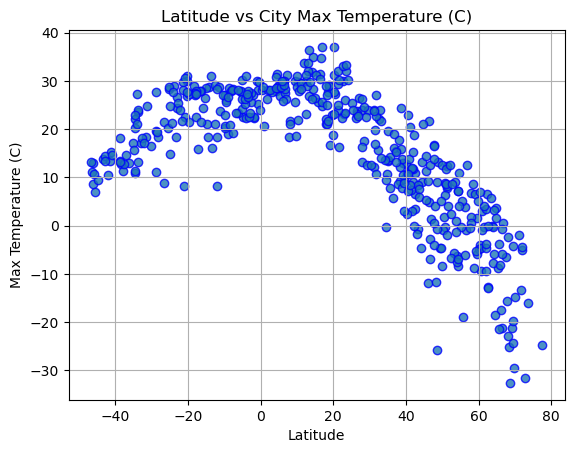

In [11]:
# Build scatter plot for latitude vs. temperature
# Get values for latitude and temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude, temperature, alpha=0.8, edgecolors = "b")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs City Max Temperature (C)")
plt.grid()

# # Save the figure
plt.savefig("../output_data/latitude_maxtemp.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

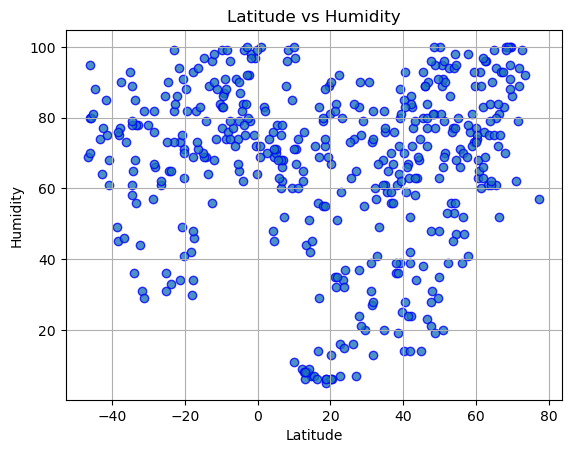

In [12]:
# Build the scatter plots for latitude vs. humidity
# Get values for humidity
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, alpha=0.8, edgecolors = "b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

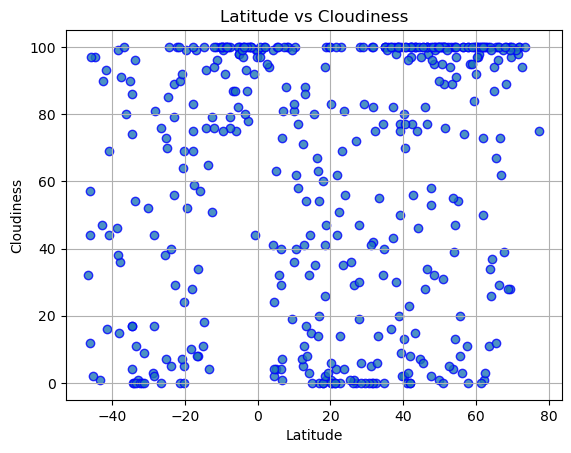

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# Get values for cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, alpha=0.8, edgecolors = "b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

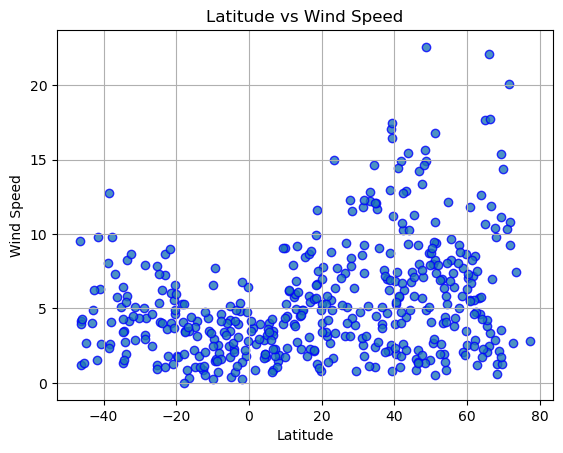

In [14]:
# Build the scatter plots for latitude vs. wind speed
# Get values for wind speed
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, alpha=0.8, edgecolors = "b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

# Take the required values from the dataframe and store as variable. To be used for scatter plots below.
northern_latitude = northern_hemi_df["Lat"]
northern_temperature = northern_hemi_df["Max Temp"]
northern_humidity = northern_hemi_df["Humidity"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
northern_windspeed = northern_hemi_df["Wind Speed"]

In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

# # Take the required values from the dataframe and store as variable. To be used for scatter plots below.
southern_latitude = southern_hemi_df["Lat"]
southern_temperature = southern_hemi_df["Max Temp"]
southern_humidity = southern_hemi_df["Humidity"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
southern_windspeed = southern_hemi_df["Wind Speed"]

###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.88


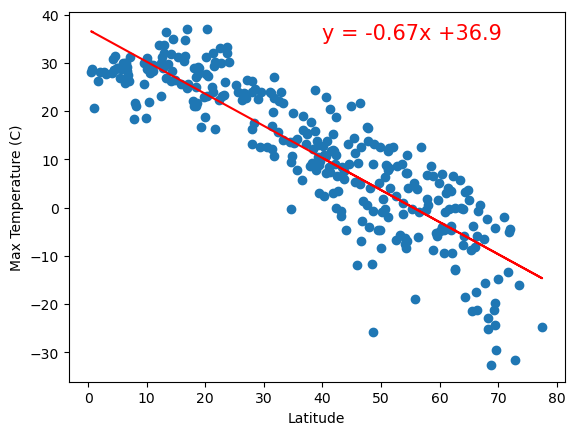

In [18]:
# Linear regression on Northern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_latitude, northern_temperature)

# Get regression values
regress_values = northern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(northern_latitude, northern_temperature)
plt.plot(northern_latitude,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Print r value
print(f"r-value = {round(rvalue,2)}")


r-value = 0.6


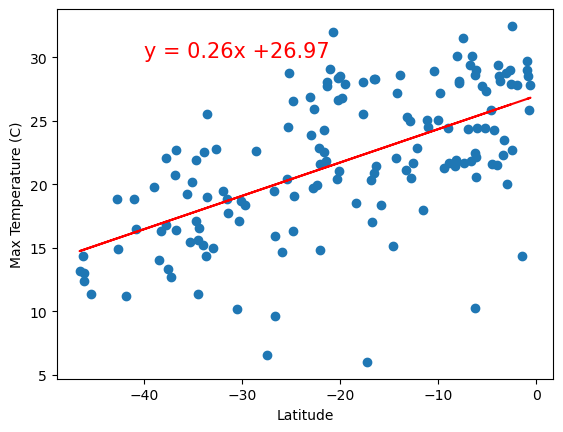

In [84]:
# Linear regression on Southern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_latitude, southern_temperature)

# Get regression values
regress_values = southern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(southern_latitude, southern_temperature)
plt.plot(southern_latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Print r value
print(f"r-value = {round(rvalue,2)}")

**Discussion about the linear relationship:** 
1. The relationship between the latitude vs max temperature are both linear.
2. Northern hemisphere is more linear correlated (|r| = 0.88) than southern hemisphere (|r| = 0.6).
3. As latitude goes to 0 for both northern and southern hemisphere, which is the latitude of the equator, temperature increases. 
4. In general. more data points (cities) in the Northern Hemisphere than Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.3


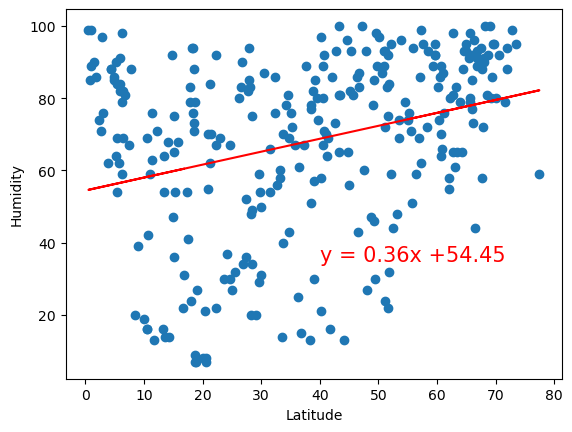

In [86]:
# Northern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_latitude, northern_humidity)

# Get regression values
regress_values = northern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(northern_latitude, northern_humidity)
plt.plot(northern_latitude,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value = {round(rvalue,2)}")

r-value = 0.29


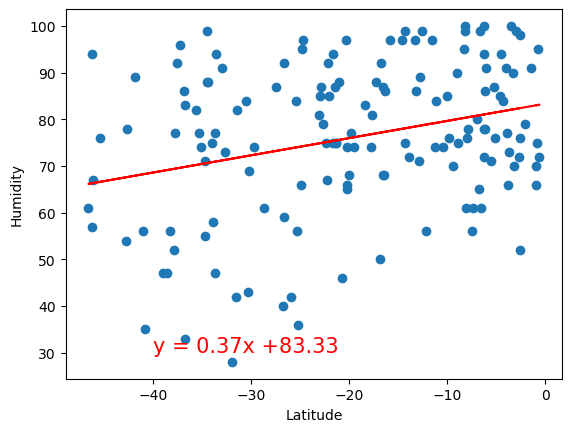

In [89]:
# Southern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_latitude, southern_humidity)

# Get regression values
regress_values = southern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression on
plt.scatter(southern_latitude, southern_humidity)
plt.plot(southern_latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value = {round(rvalue,2)}")

**Discussion about the linear relationship:** 
1. Low r value indicates that there is not much linear correlation between latitude and humidity in both hemisphere. 
2. However, for northern hemisphere, humidity spread are tighter (~60-100%) at higher latitude than at lower latitude (closer to equator). The wider spread of humidity at lower latitude (from 0-100%) also indicates that areas around middle east, northern africa are dry and low humidity; while areas in southeast asia are wet and high humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.25


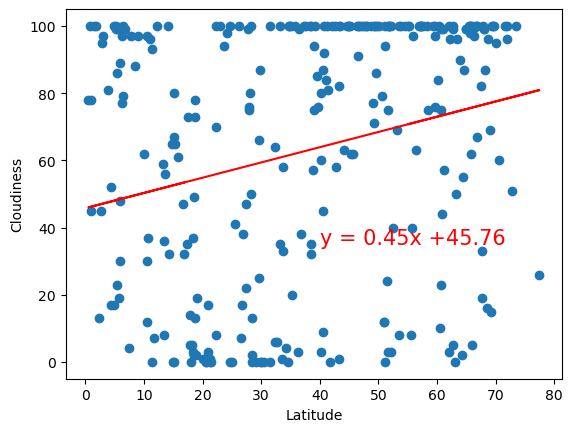

In [90]:
# Northern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_latitude, northern_cloudiness)

# Get regression values
regress_values = northern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(northern_latitude, northern_cloudiness)
plt.plot(northern_latitude,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value = {round(rvalue,2)}")

r-value = 0.28


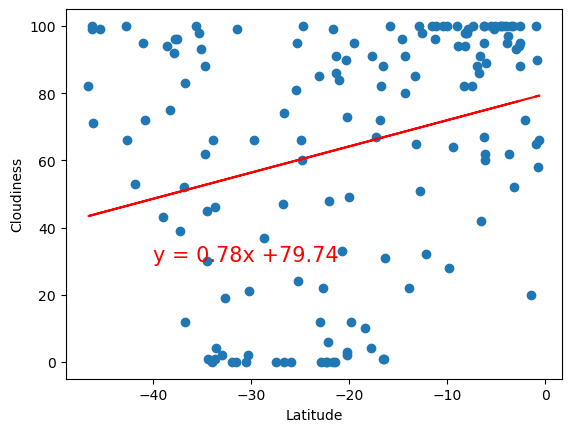

In [91]:
# Southern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_latitude, southern_cloudiness)

# Get regression values
regress_values = southern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(southern_latitude, southern_cloudiness)
plt.plot(southern_latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value = {round(rvalue,2)}")

**Discussion about the linear relationship:** 
1. Low r value indicates that there is not much linear correlation between latitude and cloudiness in both hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.29


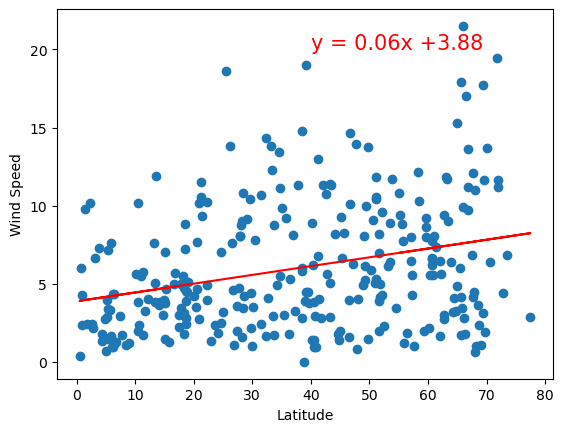

In [94]:
# Northern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_latitude, northern_windspeed)

# Get regression values
regress_values = northern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(northern_latitude, northern_windspeed)
plt.plot(northern_latitude,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r value
print(f"r-value = {round(rvalue,2)}")

r-value = -0.32


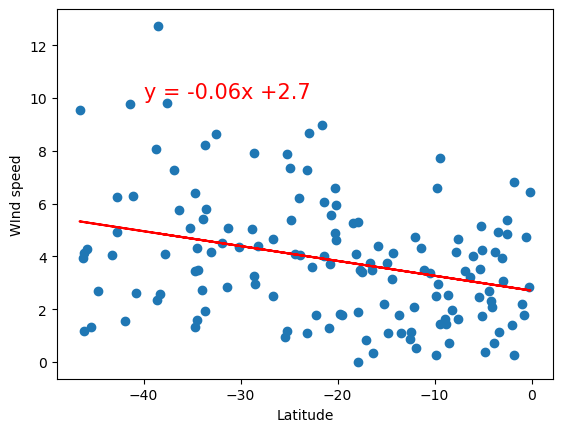

In [19]:
# Southern Hemisphere
# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_latitude, southern_windspeed)

# Get regression values
regress_values = southern_latitude * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(southern_latitude, southern_windspeed)
plt.plot(southern_latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("WInd speed")

# Print r value
print(f"r-value = {round(rvalue,2)}")

**Discussion about the linear relationship:** 
1. Low r value indicates that there is not much linear correlation between latitude and wind speed in both hemisphere.
2. Although not much linear correlation, wind speed range are tighter when approaching to equator (latitude = 0).